Naive Bayes results: 

Test data set average precision:
[ 0.62820513  0.67816092  0.57738095  0.79047619  0.74561404  0.82142857]

Test data set average recall:
[ 0.59259259  0.6747182   0.56280193  0.74557166  0.68035427  0.76337793]

Test data set average fscore:
[ 0.57070707  0.67532468  0.54954955  0.74533107  0.67032967  0.76118742]


clf__alpha :  0.5
tfidf__min_df :  5
tfidf__stop_words :  None
Best f1 score: 0.732646048658

Grid search results: 

Test data set average precision:
[ 0.71217105  0.72        0.65833333  0.69871795  0.86486486  0.66193182]

Test data set average recall:
[ 0.69907407  0.72141707  0.65297907  0.69967794  0.7826087   0.64297659]

Test data set average fscore:
[ 0.69846275  0.71955128  0.65320277  0.6989161   0.78298611  0.63798349]


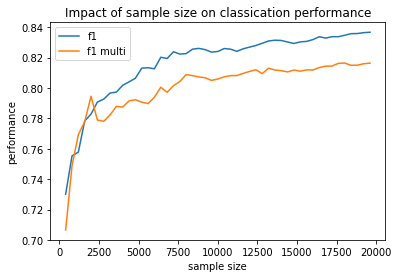


 1.How sample size affects each classifier’s performance? 

 loking at the graph I can conclude that till 2500 sample size the both graph. Then multinominal Classifier's performance decreses 

 2.How many samples do you think would be needed for each model for good performance?

 I think more 20000 samples in total would be needed for good performance

 3.How is performance of SVM classifier compared with Naïve Bayes classifier?

 SVM classifier's efficiancy and performance are more for high samples compared with Naïve Bayes classifier


In [5]:
import csv
from nltk.corpus import stopwords
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

def multinomialnb(file):
    
    with open(file, 'r') as f:
        data = [tuple(line) for line in csv.reader(f)]

    target,nr,text=zip(*data)
    
    target=list(target)
    text=list(text)

    tfidf_vect = TfidfVectorizer(stop_words = "english") 
    dtm = tfidf_vect.fit_transform(text)
    metrics = ['precision_macro', 'recall_macro', "f1_macro"]
    clf = MultinomialNB(alpha=0.8)
    cv = cross_validate(clf, dtm, target, scoring=metrics, cv=6)
    
    print("Naive Bayes results: \n")
    print("Test data set average precision:")
    print(cv['test_precision_macro'])
    print("\nTest data set average recall:")
    print(cv['test_recall_macro'])
    print("\nTest data set average fscore:")
    print(cv['test_f1_macro'])
    
def grid_search(file):

    with open(file, 'r') as f:
        data = [tuple(line) for line in csv.reader(f)]
        
    stop_words = stopwords.words('english')

    target,nr,text=zip(*data)
    
    target=list(target)
    text=list(text)
    
    text_clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

    parameters = {'tfidf__min_df':[1, 2, 3, 5],
                  'tfidf__stop_words':[None, "english"],
                  'clf__alpha': [0.5, 1.0, 1.5, 2.0],}

    metric =  "f1_macro"

    gs_clf = GridSearchCV(text_clf, param_grid=parameters, scoring=metric, cv=6)
    gs_clf = gs_clf.fit(text, target)
    print("\n")
    
    for param_name in gs_clf.best_params_:
        print(param_name,": ",gs_clf.best_params_[param_name])

    print("Best f1 score:", gs_clf.best_score_)
    
    metrics = ['precision_macro', 'recall_macro', "f1_macro"]
    
    tfidf_vect = TfidfVectorizer(stop_words = "english", min_df = 5) 
    gs_dtm = tfidf_vect.fit_transform(text)
    gs_clf = MultinomialNB(alpha = 0.5)
    gs_cv = cross_validate(gs_clf, gs_dtm, target, scoring=metrics, cv=6)
    
    print("\nGrid search results: \n")
    print("Test data set average precision:")
    print(gs_cv['test_precision_macro'])
    print("\nTest data set average recall:")
    print(gs_cv['test_recall_macro'])
    print("\nTest data set average fscore:")
    print(gs_cv['test_f1_macro'])
    #print(gs_cv['train_f1_macro'])

def sample(file1):
    
    list1=[]
    with open('amazon_review_large.csv','r') as f:
        reader=csv.reader(f)
        list1=[(line[0], line[1]) for line in reader]

    y, x= zip(*list1)
    Y=list(y)
    X=list(x)
    
    metrics = ['precision_macro', 'recall_macro', "f1_macro"]

    r=[]
    r1=[]
    tfidf_vect = TfidfVectorizer(stop_words="english") 
    clf = svm.LinearSVC()
    clf1 = MultinomialNB(alpha=0.8)
    s=400
    
    while s<20000:
        dtm= tfidf_vect.fit_transform(X[0:s])
        cv = cross_validate(clf, dtm, y[0:s], scoring=metrics, cv=10)
        r.append((s, np.mean(np.array(cv['test_precision_macro'])),\
                       np.mean(np.array(cv['test_recall_macro'])),\
                       np.mean(np.array(cv['test_f1_macro']))))
        s+=400 
    
    
    
    s1=400
    while s1<20000:
        dtm= tfidf_vect.fit_transform(X[0:s1])
        cv = cross_validate(clf1, dtm, y[0:s1], scoring=metrics, cv=10)
        r1.append((s1, np.mean(np.array(cv['test_precision_macro'])),\
                       np.mean(np.array(cv['test_recall_macro'])),\
                       np.mean(np.array(cv['test_f1_macro']))))
        s1+=400 
        
    r=np.array(r)
    r1=np.array(r1)
    
    
    plt.plot(r[:,0], r[:,3], '-', label='f1')
    plt.plot(r1[:,0], r1[:,3], '-', label='f1 multi')
    
    
    plt.title('Impact of sample size on classication performance')
    plt.ylabel('performance')
    plt.xlabel('sample size')
    plt.legend()
    plt.show()
    
if __name__ == "__main__":
    
    file = "amazon_review_300.csv"
    multinomialnb(file);
    
    grid_search(file)
    
    file1 = "amazon_review_large.csv"
    sample(file1)
    
    print("\n 1.How sample size affects each classifier’s performance? ")
    
    print("\n loking at the graph I can conclude that till 2500 sample size the both graph. Then multinominal Classifier's performance decreses ")
    
    print("\n 2.How many samples do you think would be needed for each model for good performance?")
    
    print("\n I think more 20000 samples in total would be needed for good performance")
    
    print("\n 3.How is performance of SVM classifier compared with Naïve Bayes classifier?")
    
    print("\n SVM classifier's efficiancy and performance are more for high samples compared with Naïve Bayes classifier")